In [1]:
%load_ext autoreload
%autoreload 1
%aimport helpers, loaders, plotters 

In [2]:
from pprint import pprint
from math import ceil, floor
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from helpers import balanced_accuracy_scorer, balanced_accuracy, load_best_result, save_search_result, scikit_cv_result_to_df
from loaders import load_adult, load_mnist
from plotters import plot_means_w_stds, gen_and_plot_learning_curve, plot_learning_curve, gen_and_plot_validation_curve, plot_validation_curve

# Load and Preprocess Data

In [3]:
dataset = 'MNIST'
learner_type = 'DT'
loader_func = load_mnist

In [4]:
df = loader_func(preprocess=True)

Target column encoded with the following classes [ 4.  9.]
Dataset shape (13782, 785)
Value composition:
1    0.504861
0    0.495139
Name: target, dtype: float64


/home/jovyan/loaders.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  filtered_df['target'] = le.fit_transform(filtered_df['target'])


### Split data into training and testing

In [5]:
X = df[[c for c in df.columns if c != 'target']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

### Skip Scaling for decision trees - it won't make a difference

# Decision Tree Model Complexity

In [7]:
from sklearn.tree import DecisionTreeClassifier

base_clf = DecisionTreeClassifier()

base_clf.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [7]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2,21),
}

In [8]:
grid_search = GridSearchCV(
    estimator=base_clf,
    param_grid=param_grid,
    scoring='accuracy',
    return_train_score=True,
    cv=4,
    verbose=10,
    n_jobs=-1,
    refit=True,
)

In [9]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 38 candidates, totalling 152 fits
[CV] criterion=gini, max_depth=2 .....................................
[CV] criterion=gini, max_depth=2 .....................................
[CV] criterion=gini, max_depth=2 .....................................
[CV] criterion=gini, max_depth=2 .....................................
[CV]  criterion=gini, max_depth=2, score=0.8785743887277249, total=   0.5s
[CV] criterion=gini, max_depth=3 .....................................
[CV]  criterion=gini, max_depth=2, score=0.9025704809286899, total=   0.5s
[CV] criterion=gini, max_depth=3 .....................................
[CV]  criterion=gini, max_depth=2, score=0.8958938199917047, total=   0.5s
[CV] criterion=gini, max_depth=3 .....................................
[CV]  criterion=gini, max_depth=2, score=0.9021153048527581, total=   0.5s
[CV] criterion=gini, max_depth=3 .....................................
[CV]  criterion=gini, max_depth=3, score=0.9237147595356551, total=   

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.3s


[CV]  criterion=gini, max_depth=4, score=0.9100704517198508, total=   0.8s
[CV] criterion=gini, max_depth=5 .....................................
[CV]  criterion=gini, max_depth=4, score=0.9336650082918739, total=   0.8s
[CV] criterion=gini, max_depth=5 .....................................
[CV]  criterion=gini, max_depth=4, score=0.9265864786395687, total=   0.8s
[CV] criterion=gini, max_depth=5 .....................................
[CV]  criterion=gini, max_depth=4, score=0.9340522604728329, total=   0.8s
[CV] criterion=gini, max_depth=5 .....................................


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.1s


[CV]  criterion=gini, max_depth=5, score=0.9394944053046, total=   0.9s
[CV] criterion=gini, max_depth=6 .....................................
[CV]  criterion=gini, max_depth=5, score=0.943200663349917, total=   1.0s
[CV] criterion=gini, max_depth=6 .....................................
[CV]  criterion=gini, max_depth=5, score=0.9435918705931149, total=   1.0s
[CV] criterion=gini, max_depth=6 .....................................
[CV]  criterion=gini, max_depth=5, score=0.9448361675653256, total=   0.9s
[CV] criterion=gini, max_depth=6 .....................................
[CV]  criterion=gini, max_depth=6, score=0.9444674678823042, total=   1.1s
[CV] criterion=gini, max_depth=7 .....................................
[CV]  criterion=gini, max_depth=6, score=0.9461028192371476, total=   1.1s
[CV]  criterion=gini, max_depth=6, score=0.9543757776856077, total=   1.0s
[CV] criterion=gini, max_depth=7 .....................................
[CV] criterion=gini, max_depth=7 ....................

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.1s


[CV] criterion=gini, max_depth=7 .....................................
[CV]  criterion=gini, max_depth=7, score=0.9452963116452548, total=   1.2s
[CV] criterion=gini, max_depth=8 .....................................
[CV]  criterion=gini, max_depth=7, score=0.9514925373134329, total=   1.3s
[CV]  criterion=gini, max_depth=7, score=0.959767731231854, total=   1.3s
[CV] criterion=gini, max_depth=8 .....................................
[CV]  criterion=gini, max_depth=7, score=0.944421401907922, total=   1.3s
[CV] criterion=gini, max_depth=8 .....................................
[CV] criterion=gini, max_depth=8 .....................................


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.6s


[CV]  criterion=gini, max_depth=8, score=0.9461251554082055, total=   1.3s
[CV] criterion=gini, max_depth=9 .....................................
[CV]  criterion=gini, max_depth=8, score=0.9469099958523435, total=   1.3s
[CV] criterion=gini, max_depth=9 .....................................
[CV]  criterion=gini, max_depth=8, score=0.956882255389718, total=   1.4s
[CV]  criterion=gini, max_depth=8, score=0.9581086686022398, total=   1.4s
[CV] criterion=gini, max_depth=9 .....................................
[CV] criterion=gini, max_depth=9 .....................................
[CV]  criterion=gini, max_depth=9, score=0.9510982179859097, total=   1.5s
[CV] criterion=gini, max_depth=10 ....................................
[CV]  criterion=gini, max_depth=9, score=0.9639303482587065, total=   1.5s
[CV] criterion=gini, max_depth=10 ....................................
[CV]  criterion=gini, max_depth=9, score=0.9614267938614682, total=   1.5s
[CV] criterion=gini, max_depth=10 ................

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.8s


[CV]  criterion=gini, max_depth=10, score=0.9589552238805971, total=   1.6s
[CV] criterion=gini, max_depth=11 ....................................
[CV]  criterion=gini, max_depth=10, score=0.9643301534632932, total=   1.6s
[CV] criterion=gini, max_depth=11 ....................................
[CV]  criterion=gini, max_depth=10, score=0.9523019493985898, total=   1.7s
[CV] criterion=gini, max_depth=11 ....................................
[CV]  criterion=gini, max_depth=11, score=0.9498549523414836, total=   1.7s
[CV] criterion=gini, max_depth=12 ....................................
[CV]  criterion=gini, max_depth=11, score=0.9556384742951907, total=   1.7s
[CV] criterion=gini, max_depth=12 ....................................
[CV]  criterion=gini, max_depth=11, score=0.9531314807133969, total=   1.7s
[CV] criterion=gini, max_depth=12 ....................................
[CV]  criterion=gini, max_depth=11, score=0.9635006221484861, total=   1.7s
[CV] criterion=gini, max_depth=12 ........

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.7s


[CV]  criterion=gini, max_depth=13, score=0.950269374222959, total=   1.9s
[CV] criterion=gini, max_depth=14 ....................................
[CV]  criterion=gini, max_depth=13, score=0.9585406301824212, total=   2.0s
[CV] criterion=gini, max_depth=14 ....................................
[CV]  criterion=gini, max_depth=13, score=0.950228121111572, total=   1.9s
[CV] criterion=gini, max_depth=14 ....................................
[CV]  criterion=gini, max_depth=13, score=0.9630858564910826, total=   2.0s
[CV] criterion=gini, max_depth=14 ....................................
[CV]  criterion=gini, max_depth=14, score=0.9481972648155823, total=   2.1s
[CV] criterion=gini, max_depth=15 ....................................
[CV]  criterion=gini, max_depth=14, score=0.9597844112769486, total=   2.1s
[CV]  criterion=gini, max_depth=14, score=0.9464952301949399, total=   2.0s
[CV] criterion=gini, max_depth=15 ....................................
[CV] criterion=gini, max_depth=15 ..........

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   19.6s


[CV]  criterion=gini, max_depth=15, score=0.9601990049751243, total=   2.1s
[CV] criterion=gini, max_depth=16 ....................................
[CV]  criterion=gini, max_depth=15, score=0.962671090833679, total=   2.1s
[CV]  criterion=gini, max_depth=15, score=0.9481542928245541, total=   2.2s
[CV] criterion=gini, max_depth=16 ....................................
[CV] criterion=gini, max_depth=16 ....................................
[CV]  criterion=gini, max_depth=16, score=0.9481972648155823, total=   2.3s
[CV] criterion=gini, max_depth=17 ....................................
[CV]  criterion=gini, max_depth=16, score=0.9606135986733002, total=   2.3s
[CV] criterion=gini, max_depth=17 ....................................
[CV]  criterion=gini, max_depth=16, score=0.9406885109912899, total=   2.2s
[CV] criterion=gini, max_depth=17 ....................................
[CV]  criterion=gini, max_depth=16, score=0.9635006221484861, total=   2.3s
[CV] criterion=gini, max_depth=17 .........

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   24.8s


[CV]  criterion=gini, max_depth=18, score=0.9469539991711562, total=   2.5s
[CV] criterion=gini, max_depth=19 ....................................
[CV]  criterion=gini, max_depth=18, score=0.9440066362505185, total=   2.4s
[CV] criterion=gini, max_depth=19 ....................................
[CV]  criterion=gini, max_depth=18, score=0.9572968490878938, total=   2.5s
[CV] criterion=gini, max_depth=19 ....................................
[CV]  criterion=gini, max_depth=18, score=0.9614267938614682, total=   2.5s
[CV] criterion=gini, max_depth=19 ....................................
[CV]  criterion=gini, max_depth=19, score=0.9498549523414836, total=   2.5s
[CV] criterion=gini, max_depth=20 ....................................
[CV]  criterion=gini, max_depth=19, score=0.941518042306097, total=   2.4s
[CV] criterion=gini, max_depth=20 ....................................
[CV]  criterion=gini, max_depth=19, score=0.9535655058043118, total=   2.5s
[CV] criterion=gini, max_depth=20 .........

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   32.6s


[CV]  criterion=entropy, max_depth=2, score=0.8929904603898797, total=   0.4s
[CV] criterion=entropy, max_depth=3 ..................................
[CV]  criterion=entropy, max_depth=3, score=0.9063406547865728, total=   0.6s
[CV] criterion=entropy, max_depth=4 ..................................
[CV]  criterion=entropy, max_depth=3, score=0.9212271973466003, total=   0.6s
[CV] criterion=entropy, max_depth=4 ..................................
[CV]  criterion=entropy, max_depth=3, score=0.9124844462878474, total=   0.6s
[CV] criterion=entropy, max_depth=4 ..................................
[CV]  criterion=entropy, max_depth=3, score=0.9124844462878474, total=   0.6s
[CV] criterion=entropy, max_depth=4 ..................................
[CV]  criterion=entropy, max_depth=4, score=0.9096560298383755, total=   0.8s
[CV] criterion=entropy, max_depth=5 ..................................
[CV]  criterion=entropy, max_depth=4, score=0.9336650082918739, total=   0.8s
[CV] criterion=entropy, max_

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   35.2s


[CV] criterion=entropy, max_depth=6 ..................................
[CV]  criterion=entropy, max_depth=5, score=0.9452509332227291, total=   1.0s
[CV] criterion=entropy, max_depth=6 ..................................
[CV]  criterion=entropy, max_depth=6, score=0.9473684210526315, total=   1.2s
[CV] criterion=entropy, max_depth=7 ..................................
[CV]  criterion=entropy, max_depth=6, score=0.9535655058043118, total=   1.2s
[CV] criterion=entropy, max_depth=7 ..................................
[CV]  criterion=entropy, max_depth=6, score=0.9427623392783078, total=   1.2s
[CV]  criterion=entropy, max_depth=6, score=0.9556200746578183, total=   1.2s
[CV] criterion=entropy, max_depth=7 ..................................
[CV] criterion=entropy, max_depth=7 ..................................
[CV]  criterion=entropy, max_depth=7, score=0.9498549523414836, total=   1.2s
[CV] criterion=entropy, max_depth=8 ..................................
[CV]  criterion=entropy, max_depth=

[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   40.4s


[CV] criterion=entropy, max_depth=10 .................................
[CV]  criterion=entropy, max_depth=9, score=0.9593529655744505, total=   1.4s
[CV] criterion=entropy, max_depth=10 .................................
[CV]  criterion=entropy, max_depth=10, score=0.9544135930377123, total=   1.4s
[CV] criterion=entropy, max_depth=11 .................................
[CV]  criterion=entropy, max_depth=10, score=0.9527363184079602, total=   1.4s
[CV] criterion=entropy, max_depth=11 .................................
[CV]  criterion=entropy, max_depth=10, score=0.9572791372874326, total=   1.4s
[CV] criterion=entropy, max_depth=11 .................................
[CV]  criterion=entropy, max_depth=10, score=0.9593529655744505, total=   1.4s
[CV] criterion=entropy, max_depth=11 .................................
[CV]  criterion=entropy, max_depth=11, score=0.9506837961044343, total=   1.5s
[CV] criterion=entropy, max_depth=12 .................................
[CV]  criterion=entropy, max_d

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   45.2s


[CV]  criterion=entropy, max_depth=13, score=0.9506837961044343, total=   1.4s
[CV] criterion=entropy, max_depth=14 .................................
[CV]  criterion=entropy, max_depth=13, score=0.9543757776856077, total=   1.5s
[CV] criterion=entropy, max_depth=14 .................................
[CV]  criterion=entropy, max_depth=13, score=0.9535655058043118, total=   1.5s
[CV] criterion=entropy, max_depth=14 .................................
[CV]  criterion=entropy, max_depth=13, score=0.9610120282040647, total=   1.6s
[CV] criterion=entropy, max_depth=14 .................................
[CV]  criterion=entropy, max_depth=14, score=0.952755905511811, total=   1.4s
[CV] criterion=entropy, max_depth=15 .................................
[CV]  criterion=entropy, max_depth=14, score=0.9564496059726255, total=   1.4s
[CV] criterion=entropy, max_depth=15 .................................
[CV]  criterion=entropy, max_depth=14, score=0.9552238805970149, total=   1.5s
[CV] criterion=entropy

[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   51.9s


[CV]  criterion=entropy, max_depth=17, score=0.956864371630029, total=   1.5s
[CV] criterion=entropy, max_depth=18 .................................
[CV]  criterion=entropy, max_depth=17, score=0.9564676616915423, total=   1.6s
[CV] criterion=entropy, max_depth=18 .................................
[CV]  criterion=entropy, max_depth=17, score=0.9618415595188718, total=   1.5s
[CV] criterion=entropy, max_depth=18 .................................
[CV]  criterion=entropy, max_depth=18, score=0.949026108578533, total=   1.5s
[CV] criterion=entropy, max_depth=19 .................................
[CV]  criterion=entropy, max_depth=18, score=0.9502487562189055, total=   1.5s
[CV] criterion=entropy, max_depth=19 .................................
[CV]  criterion=entropy, max_depth=18, score=0.956864371630029, total=   1.5s
[CV] criterion=entropy, max_depth=19 .................................
[CV]  criterion=entropy, max_depth=18, score=0.9630858564910826, total=   1.5s
[CV] criterion=entropy, 

[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   57.4s finished


GridSearchCV(cv=4, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(2, 21)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=10)

In [10]:
save_search_result(grid_search, dataset, learner_type)

In [11]:
res = load_best_result(dataset, learner_type)

Found the following results files for this dataset/algorithm: ['0.957_MNIST_DT_2018-09-14_18:13-04:00.pkl', '0.957_MNIST_DT_2018-09-19_22-32-04-00.pkl']
Returning results for the highest-scoring-file: 0.957_MNIST_DT_2018-09-19_22-32-04-00.pkl


### Analysis

#### Top 10 scores

In [12]:
res_df = scikit_cv_result_to_df(res)
res_df.sort_values(by='rank_test_score').head(10)

mean_fit_time  std_fit_time  mean_score_time  \
criterion max_depth                                                 
gini      10              1.602003      0.030886         0.004007   
entropy   16              1.476885      0.050235         0.003013   
gini      12              1.804040      0.015531         0.004179   
entropy   14              1.430550      0.036470         0.003339   
          17              1.497214      0.064379         0.003485   
gini      9               1.495297      0.020679         0.003577   
entropy   10              1.430965      0.013331         0.003371   
          11              1.475143      0.027863         0.003242   
gini      11              1.720900      0.023212         0.003713   
          13              1.949760      0.036151         0.003946   

                     std_score_time  mean_test_score  std_test_score  \
criterion max_depth                                                    
gini      10               0.000583         0.956981        0.005033   
entropy   16               0.000094         0.956567        0.003654   
gini      12               0.000933         0.956359        0.006864   
entropy   14               0.000369         0.956359        0.002997   
          17               0.000285         0.956049        0.004575   
gini      9                0.000298         0.955945        0.006921   
entropy   10               0.000403         0.955945        0.002551   
          11               0.000336         0.955738        0.005531   
gini      11               0.000675         0.955530        0.005037   
          13               0.000486         0.955530        0.005521   

                     rank_test_score  mean_train_score  std_train_score  
criterion max_depth                                                      
gini      10                       1          0.990152         0.000383  
entropy   16                       2          1.000000         0.000000  
gini      12                       3          0.991707         0.000603  
entropy   14                       3          0.999620         0.000151  
          17                       5          1.000000         0.000000  
gini      9                        6          0.987388         0.000394  
entropy   10                       6          0.994990         0.001338  
          11                       8          0.996648         0.001022  
gini      11                       9          0.991223         0.000464  
          13                       9          0.992156         0.000760

In [13]:
gini = res_df.xs('gini', level='criterion')
entropy = res_df.xs('entropy', level='criterion')

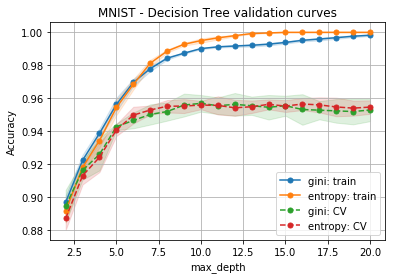

In [14]:
plot_means_w_stds(
    means=(gini['mean_train_score'], entropy['mean_train_score'], gini['mean_test_score'], entropy['mean_test_score']),
    stds=(gini['std_train_score'], entropy['std_train_score'], gini['std_test_score'], entropy['std_test_score']),
    xrange=param_grid['max_depth'],
    xlabel='max_depth',
    ylabel='Accuracy',
    series_labels=('gini: train', 'entropy: train', 'gini: CV', 'entropy: CV'),
    title='MNIST - Decision Tree validation curves'
)

## Learning curve analysis

In [15]:
best_params = res['params'][np.argmax(res['mean_test_score'])]
best_score = np.max(res['mean_test_score'])

print(best_params)
print(best_score)

{'criterion': 'gini', 'max_depth': 10}
0.956981445009


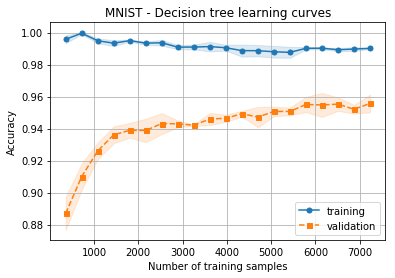

In [19]:
clf = DecisionTreeClassifier(**best_params)
train_sizes, _, _, train_mean, train_std, test_mean, test_std = gen_and_plot_learning_curve(clf, X_train, y_train, ylim=None, cv=4, train_sizes=np.linspace(.05, 1.0, 20),title='MNIST - Decision tree learning curves')



# Performance on Test Set

In [8]:
best_clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    random_state=1
)

best_clf.fit(X_train, y_train)
y_test_pred = best_clf.predict(X_test)
test_score = accuracy_score(y_test, y_test_pred)
print('%.4f' % test_score)

0.9591
